# Life Expectancy & GDP Data

In this project, I investigate relationships between the gross domestic product (GDP) of a country and the life expectancy of its citizens.

This analysis uses visualization techniques provided through the Python modules `matplotlib` and `seaborn`.

## Import Python Modules

First, we must import the relevant Python modules:
* `matplotlib`
* `pandas`
* `seaborn`
* `stats`

In [28]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

Now, we load the file `all_data.csv` into a DataFrame which we will call `df`. Then, we use the `.head()` function to inspect the data.

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Notice that the third column has the very unwieldy name of "Life expectancy at birth (years)." This could make our code difficult to read.

To remedy this, we will shorten the name of that column to simply "Life_Expectancy" using `pandas`, the inspect the data using `.head()` to make sure our change was implemented.

In [4]:
df.rename(
    columns = {'Life expectancy at birth (years)' : 'Life_Expectancy'},
    inplace = True
)
df.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Examine Data

Now, we can start examining our data:

* `GDP` is short for gross domestic product, a monetary measure of the market value of all goods and services produced in a region for a given time period. For this project, GDP is measured in USD.
* `Life_Expectancy` measures life expectancy *at birth*. This is the summary of the average amount of time a person born in a given country in a given year can expect to live.

This DataFrame measures the life expectancy and GDP between 2000 and 2015 for the following six countries:

* Chile
* China
* Germany
* Mexico
* United States
* Zimbabwe

### Comparing Averages

To take a first look at these data, I will create two bar charts for average GDP and average life expectancy. For both charts, the height of each bar will correspond to the average GDP or life expectancy that each country achieved between 2000 and 2015.

Text(0, 0.5, 'GDP (x10^13 USD)')

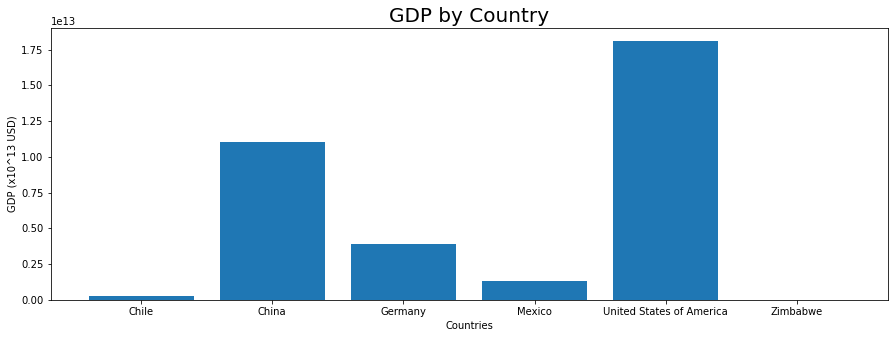

In [32]:
# Plotting GDP
plt.figure(figsize = (15, 5))
plt.bar(df['Country'], df['GDP'])
plt.title('GDP by Country', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('GDP (x10^13 USD)')

Text(0, 0.5, 'Life Expectancy (Years)')

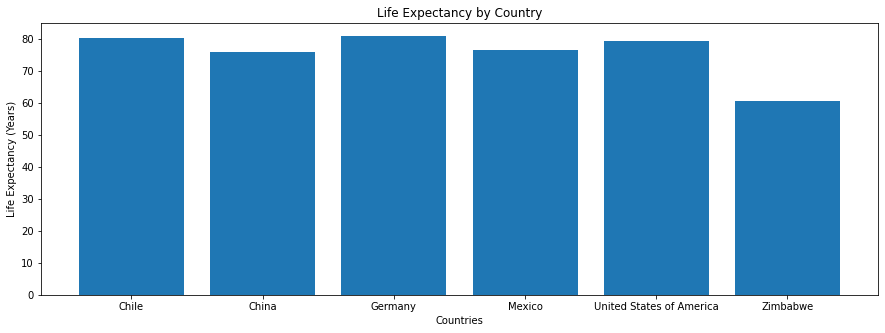

In [33]:
# Plotting life expectancy
plt.figure(figsize = (15, 5))
plt.bar(df['Country'], df['Life_Expectancy'])
plt.title('Life Expectancy by Country')
plt.xlabel('Countries')
plt.ylabel('Life Expectancy (Years)')

As we can see by the above charts, there is very high variance between the GDPs of each country. In fact, Zimbabwe's GDP is so small compared to the others that its bar seems almost invisible.

However, there is less variation between the life expectancies of each country,though it is clear here as well that Zimbabwe has the lowest life expectancy of the set.

### Comparing Life Expectancy Distributions

Now, we will examine the life expectancy distributions of each country using violin plots. In the followin figures, the thinner the shape of the "violin," the greater the life expectancy distribution during the 15-year timeframe.

Text(0, 0.5, 'Life Expectancy (Years)')

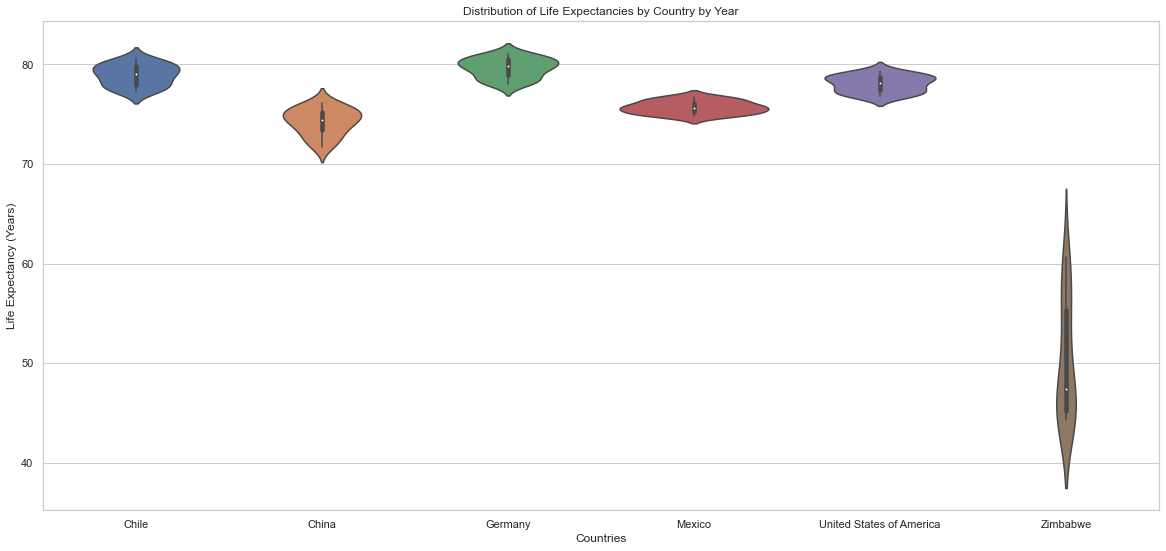

In [34]:
plt.figure(figsize = (20, 9))
sns.set(style = 'whitegrid')
ax = sns.violinplot(df['Country'], df['Life_Expectancy'])
plt.title('Distribution of Life Expectancies by Country by Year')
plt.xlabel('Countries')
plt.ylabel('Life Expectancy (Years)')

As we can see, the shape of Zimbabwe's "violin" is the thinnest in the set, indicating that it had the greatest fluctuation in life expectancy during the period in question. In contrast, Mexico's "violin" is flattest since its life expectancy fluctuated the least. These fluctuations will become more apparent as we plot life expectancy over time as a line chart.

### Life Expectancy Over Time

I will create two line charts representing each country's GDP and life expectancy over the period between 2000 and 2015. Before we plot our charts, we must pivot our DataFrame. Since we want to perform other analyses on the un-pivoted chart, we will create a new DataFrame.

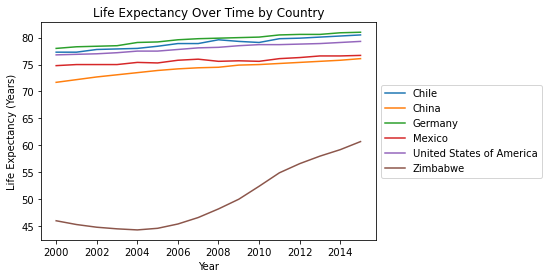

In [23]:
df_pivot1 = df.pivot(index = 'Year', columns = 'Country', values = 'Life_Expectancy')
df_pivot1.plot()
plt.title('Life Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

From this chart, we can conclude that, over time, life expectancy has increased in the six countries. Zimbabwe exhibits the most dramatic increase, increasing from less than 50 in 2000 to over 60 in 2015.

### GDP Over Time

Next, we will create a similar line chart for GDP. As with the previous visualization, we will first create a pivot DataFrame.

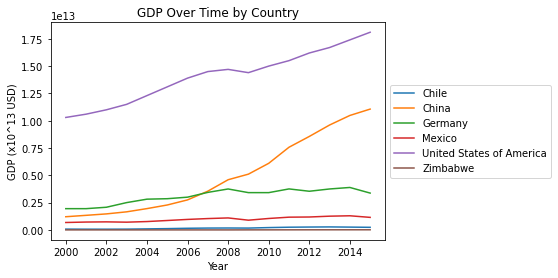

In [25]:
df_pivot2 = df.pivot(index = 'Year', columns = 'Country', values = 'GDP')
df_pivot2.plot()
plt.title('GDP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP (x10^13 USD)')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

As we can see in this graph, most countries in the dataset had steady GDPs during this period except the United States and China, which experienced substantial growth during this period.

In most of these countries, we can see a dip in GDP around 2008, coinciding with the financial crisis of that year.

### Correlation Between GDP & Life Expectancy

Now, we will mathematically determine if there is a statistically significant correlation between a country's GDP and its life expectancy at birth.

`stats` has a built-in function, `pearsonr`, that can be used to determine the correlation coefficient and p-value of a set of data.

In [29]:
GDPs= df['GDP']
Life_Expectancies = df['Life_Expectancy']

stats.pearsonr(GDPs, Life_Expectancies)

(0.343206748449156, 0.0006187129569469811)

The correlation coefficient of approximately 0.34 indicates a positive correlation between GDP and life expectancy. That is, countries with higher GDPs tend to have higher life expectancy.

The p-value is less than 0.05, indicating that this correlation is statistically significant. Thus, it is very likely that national GDP contributes strongly to the life expectancies of people in that country.

It should be noted, however, that the data used in this project are somewhat primitive in that there are no standard deviation calculations or errors and few variables. Thus, we should not draw the conclusion that GDP leads to an increase in life expectancy from these data alone.